<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/ISQS3344/blob/main/ISQS3344_ch13_SOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales and Operations Plan Exercises    
**from Heizer's Production and Operations Management, 14th edition**    

<u>**Chapter 13**</u>    


##Housekeeping    

*Imports of libraries and other setup before we start.*    

In [50]:
# import pandas library for dataframes and other functionality 
import pandas as pd

# import numpy library for arithmetic on arrays    
import numpy as np

# import datetime object from datetime library for date/time logic 
from datetime import datetime  

# import matplotlib library and related objects for plotting    
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()    

import matplotlib.pyplot as pyplot 


##Load the source data file    

*Read a copy of the Example 13-2 Roofing Supplier monthly demand data into the current working directory using a `.CSV` file which has a copy of the original data.*    


In [1]:
# ask the operating system to copy a file from Github to the local, current working directory 
!curl "https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/data/main/heizer-om_13-2_monthlyroofing.csv" -o heizer-om_13-2_monthlyroofing.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   158  100   158    0     0    858      0 --:--:-- --:--:-- --:--:--   858


##Read Data into a Dataframe    

*Read the `.CSV` file contents into a `demand_df` dataframe.*

In [3]:
# reading the local .csv file into a dataframe
demand_df = pd.read_csv('heizer-om_13-2_monthlyroofing.csv')

In [20]:
demand_df.dtypes

month              object
year               object
expected_demand     int64
production_days     int64
demand_per_day      int64
dtype: object

In [4]:
demand_df

,month,year,expected_demand,production_days
0,Jan,2023,900,22
1,Feb,2023,700,18
2,Mar,2023,800,21
3,Apr,2023,"1,200",21
4,May,2023,"1,500",22
5,Jun,2023,"1,100",20


##Perform Transformations and Enrichment    


###Transform Expected Demand

*Replace the text in `expected_demand` with the integer equivalent of the text but first remove the ',' commas.*

In [9]:
# first, replace the commas in the text of `expected_demand` with an empty string
demand_df['expected_demand'] = demand_df['expected_demand'].str.replace(',','')

# then, replace the string values in `expected_demand` with their integer equivalent
demand_df['expected_demand'] = demand_df['expected_demand'].astype(int)

###Calculate Demand per Day    

In [16]:
# first, calculate the value of `production_days` -- this results in a value of type *float*
demand_df['demand_per_day']  = demand_df['expected_demand'] / demand_df['production_days']

# then, replace the value of `production_days` with the integer equivalent (rounded) 
demand_df['demand_per_day']  = demand_df['demand_per_day'].round().astype(int)

In [78]:
demand_df

,month,year,expected_demand,production_days,demand_per_day,level_production
period,,,,,,
2023-01-01,Jan,2023,900,22,41,50.0
2023-02-01,Feb,2023,700,18,39,50.0
2023-03-01,Mar,2023,800,21,38,50.0
2023-04-01,Apr,2023,1200,21,57,50.0
2023-05-01,May,2023,1500,22,68,50.0
2023-06-01,Jun,2023,1100,20,55,50.0


###Create a Datetime Index for Monthly Periods    

In [19]:
# transform the `year` into its string equivalent
demand_df['year'] = demand_df['year'].astype(str)

In [41]:
# create a temporary `yearmonth` column by combining the strings from `year` and `month`
demand_df['dash'] = '-'
demand_df['day'] = '-01'
demand_df['yearmonth'] = demand_df.year.str.cat(demand_df.dash) 
demand_df['yearmonth'] = demand_df.yearmonth.str.cat(demand_df.month) 
demand_df['yearmonthday'] = demand_df.yearmonth.str.cat(demand_df.day) 

In [42]:
# calculate a new column for year_month as datetime    
demand_df['period']=pd.to_datetime(demand_df['yearmonthday'])

In [43]:
# cleanup the temporary columns 
del demand_df['dash']
del demand_df['day']
del demand_df['yearmonth']
del demand_df['yearmonthday']


In [45]:
# set the `period` datetime as the row index    
demand_df.set_index('period', inplace=True)

#check datatype of index
demand_df.index

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01'],
              dtype='datetime64[ns]', name='period', freq=None)

###Calculate Level Production     

*Use the average (mean) monthly demand to calculate a steady level of production per period (month).*    


In [77]:
demand_df['level_production'] = demand_df['demand_per_day'].mean().round()

##Plot the Demand per Production Day by Period (Month)  

*Plot a bar chart of monthly demand per production day along with a line for the mean demand (level_production).*    

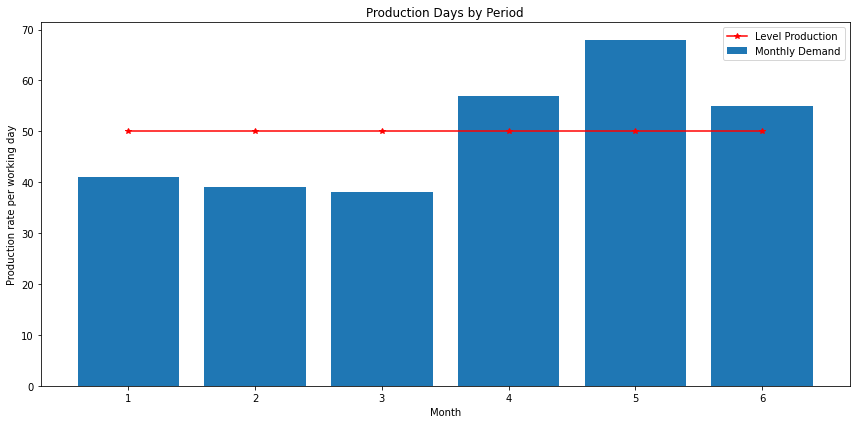

In [94]:
fig, ax = plt.subplots(figsize=(12,6))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True


# plot the bar chart of demand per production day
pyplot.bar(demand_df.index.month, demand_df["demand_per_day"])

# plot the line of level production (mean demand) per day
pyplot.plot(demand_df.index.month, demand_df["level_production"], marker='*', color='red')

pyplot.legend(['Level Production', 'Monthly Demand'])
pyplot.xlabel('Month')
pyplot.ylabel('Production rate per working day')
pyplot.title('Production Days by Period')

pyplot.show()